# MLE の漸近正規性（スコア・情報量・Taylor 展開）【一変量】

このノートは、**一変量パラメータ**に限定して、
「スコア」「情報量」「Taylor 展開」から **MLE の漸近正規性（→効率性）** を導く標準ルートをまとめた解説です。

* 真のパラメータ：\(\theta_0\)
* 観測：\(X_1,\dots,X_n\) i.i.d.（密度 \(f(x\mid\theta)\)）
* MLE：\(\hat\theta_n\)

後半では **正規分布（平均 \(\theta\)、分散既知）** を例に、
シミュレーションで「スコアの CLT」「情報量の収束」「MLE の漸近正規性」を図と表で確認します。

## 0. セットアップと正則性の前提（ざっくり）

モデル：

\[
X_1,\dots,X_n \stackrel{\text{i.i.d.}}{\sim} f(x\mid\theta),\quad \theta \in \Theta\subset\mathbb{R}
\]

正則条件（ざっくり）：

* \(f(x\mid\theta)\) は \(\theta\) で 2 回以上微分可能
* 積分と微分の順序交換ができる（支配収束などが効く）
* Fisher 情報量 \(I(\theta)\) が有限で \(>0\)
* 真の値 \(\theta_0\) の近傍で識別可能・局所的凹性がある
* MLE \(\hat\theta_n\) が \(\theta_0\) に一致（\(\hat\theta_n\to\theta_0\)）

（最後の一致性は別途証明するか、定理として仮定しておく。）

## 1. ログ尤度・スコア・情報量の定義

ログ尤度：

\[
\ell_n(\theta)
= \sum_{i=1}^n \log f(X_i\mid\theta)
\]

スコア関数（サンプル i 個分）：

\[
U_n(\theta)
= \frac{\partial}{\partial\theta}\ell_n(\theta)
= \sum_{i=1}^n U_i(\theta),
\quad U_i(\theta) := \frac{\partial}{\partial\theta}\log f(X_i\mid\theta)
\]

観測情報量（Hessian のマイナス）：

\[
J_n(\theta)
:= -\frac{\partial^2}{\partial\theta^2}\ell_n(\theta)
= -\sum_{i=1}^n \frac{\partial^2}{\partial\theta^2}\log f(X_i\mid\theta)
\]

理論上の Fisher 情報量（1 サンプルあたり）：

\[
I(\theta)
:= E_\theta\Big[ U_i(\theta)^2 \Big]
= -E_\theta\Big[ \frac{\partial^2}{\partial\theta^2}\log f(X_i\mid\theta) \Big]
\]

（右の 2 つの表現が一致するのは正則条件のもとで成り立つ基本公式。）

### 定義の整理（表）

In [1]:
import pandas as pd

summary_table = pd.DataFrame(
    [
        ["ログ尤度", r"$\\ell_n(\\theta)=\\sum_{i=1}^n \\log f(X_i\\mid\\theta)$"],
        ["スコア", r"$U_n(\\theta)=\\partial\\ell_n(\\theta)/\\partial\\theta$"],
        ["観測情報量", r"$J_n(\\theta)=-\\partial^2\\ell_n(\\theta)/\\partial\\theta^2$"],
        ["Fisher 情報", r"$I(\\theta)=\\mathrm{E}_\\theta[U_i(\\theta)^2]$"],
    ],
    columns=["量", "定義"],
)

summary_table

,量,定義
0,ログ尤度,$\\ell_n(\\theta)=\\sum_{i=1}^n \\log f(X_i\\m...
1,スコア,$U_n(\\theta)=\\partial\\ell_n(\\theta)/\\part...
2,観測情報量,$J_n(\\theta)=-\\partial^2\\ell_n(\\theta)/\\p...
3,Fisher 情報,$I(\\theta)=\\mathrm{E}_\\theta[U_i(\\theta)^2]$


## 2. スコアの性質と CLT

真のパラメータ \(\theta_0\) でのスコアをみる。

### 2-1. 1 個あたりのスコア \(U_i(\theta_0)\)

\[
U_i(\theta_0) = \frac{\partial}{\partial\theta}\log f(X_i\mid\theta)\Big|_{\theta=\theta_0}
\]

性質：

1. 期待値 0
   \[
   E_{\theta_0}[U_i(\theta_0)] = 0
   \]
2. 分散 = Fisher 情報
   \[
   \mathrm{Var}_{\theta_0}(U_i(\theta_0)) = I(\theta_0)
   \]

### 2-2. n 個分のスコア \(U_n(\theta_0)\)

\[
U_n(\theta_0) = \sum_{i=1}^n U_i(\theta_0)
\]

i.i.d. なので

* \(E[U_n(\theta_0)] = 0\)
* \(\mathrm{Var}(U_n(\theta_0)) = n I(\theta_0)\)

中心極限定理より

\[
\frac{1}{\sqrt{n}}U_n(\theta_0)
\xrightarrow{d} N(0, I(\theta_0))
\]

これが「スコアの CLT」。

## 3. MLE はスコア = 0 を満たす → Taylor 展開

MLE \(\hat\theta_n\) は正則な状況では

\[
U_n(\hat\theta_n) = 0
\]

ここで、\(\theta_0\) のまわりで \(U_n(\theta)\) を Taylor 展開する。

\[
0 = U_n(\hat\theta_n)
= U_n(\theta_0) + U'_n(\tilde\theta_n)(\hat\theta_n - \theta_0)
\]

\(\tilde\theta_n\) は \(\theta_0\) と \(\hat\theta_n\) の間の値。
整理すると

\[
\hat\theta_n - \theta_0
= -\frac{1}{U'_n(\tilde\theta_n)} U_n(\theta_0)
\]

ここから \(\sqrt{n}(\hat\theta_n - \theta_0)\) を引き出す。

## 4. 観測情報量の振る舞い（LLN）

\[
U'_n(\theta) = \frac{d^2}{d\theta^2}\ell_n(\theta)
= \sum_{i=1}^n \frac{d^2}{d\theta^2}\log f(X_i\mid\theta)
\]

したがって

\[
-\frac{1}{n}U'_n(\theta)
= \frac{1}{n}J_n(\theta)
= \frac{1}{n}\sum_{i=1}^n
\Big[
-\frac{d^2}{d\theta^2}\log f(X_i\mid\theta)
\Big]
\]

正則性条件と LLN により

\[
-\frac{1}{n}U'_n(\theta_0) \xrightarrow{P} I(\theta_0)
\]

さらに \(\hat\theta_n\to\theta_0\) から \(\tilde\theta_n\to\theta_0\) も成り立つので

\[
-\frac{1}{n}U'_n(\tilde\theta_n) \xrightarrow{P} I(\theta_0)
\]

## 5. √n スケールに乗せて Slutsky

\[
\sqrt{n}(\hat\theta_n - \theta_0)
= \Big(-\frac{1}{n}U'_n(\tilde\theta_n)\Big)^{-1}
\cdot \frac{U_n(\theta_0)}{\sqrt{n}}
\]

* \(\frac{U_n(\theta_0)}{\sqrt{n}} \xrightarrow{d} N(0, I(\theta_0))\)
* \(-\frac{1}{n}U'_n(\tilde\theta_n) \xrightarrow{P} I(\theta_0)\)

Slutsky により

\[
\sqrt{n}(\hat\theta_n - \theta_0)
\xrightarrow{d}
N\big(0, I(\theta_0)^{-1}\big)
\]

これが **MLE の漸近正規性**。

## 6. 漸近分散と効率性

得られた結果から

\[
\mathrm{Var}(\hat\theta_n) \approx \frac{1}{n}I(\theta_0)^{-1}
\]

一方 Cramér–Rao 下界より

\[
\mathrm{Var}(T) \ge \frac{1}{n I(\theta_0)}
\]

よって MLE は **漸近的に効率的**。

# 以降はシミュレーション（正規分布モデル）

**モデル：** \(X_i \sim N(\theta, \sigma^2)\)（\(\sigma=1\) 既知）

このとき

* スコア：\(U_i(\theta)= (X_i-\theta)/\sigma^2\)
* Fisher 情報：\(I(\theta)=1/\sigma^2=1\)
* MLE：\(\hat\theta_n=\bar X\)

以下で **グラフと表** をたくさん使って確認する。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

sigma = 1.0
theta0 = 0.0

plt.style.use("seaborn-v0_8-whitegrid")

## 7. スコアの CLT を図で確認

\(U_n(\theta_0)/\sqrt{n}\) の分布が \(N(0,1)\) に近づく様子。

/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
 

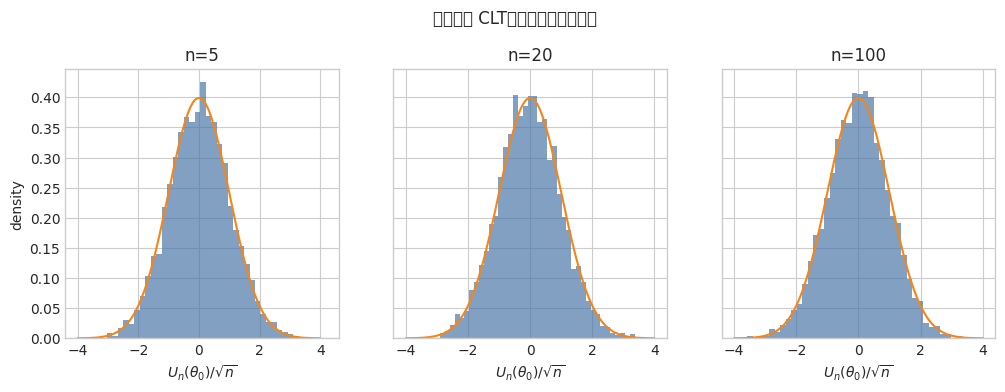

In [3]:
def simulate_score_clt(n, reps=5000):
    x = rng.normal(theta0, sigma, size=(reps, n))
    score = (x - theta0).sum(axis=1) / sigma**2
    return score / np.sqrt(n)

fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True)

for ax, n in zip(axes, [5, 20, 100]):
    data = simulate_score_clt(n)
    ax.hist(data, bins=40, density=True, alpha=0.7, color="#4C78A8")
    xs = np.linspace(-4, 4, 200)
    ax.plot(xs, (1 / np.sqrt(2 * np.pi)) * np.exp(-xs**2 / 2), color="#F58518")
    ax.set_title(f"n={n}")
    ax.set_xlabel(r"$U_n(\theta_0)/\sqrt{n}$")

axes[0].set_ylabel("density")
fig.suptitle("スコアの CLT：正規近似への収束", y=1.05)
plt.show()

## 8. 観測情報量の収束

\(-\frac{1}{n}U'_n(\theta_0) = \frac{1}{n}J_n(\theta_0)\) が 1 に近づく様子。

/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35251 (\N{CJK UNIFIED IDEOGRAPH-89B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAP

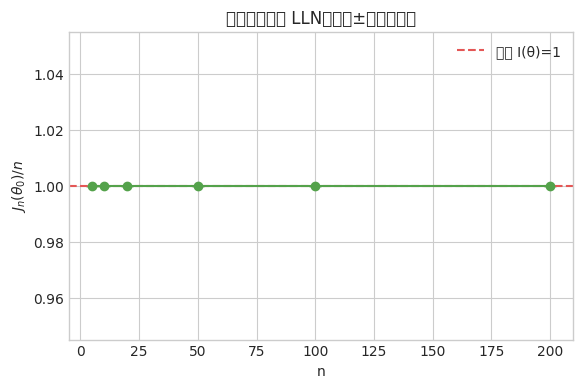

In [4]:
def observed_info_per_sample(n, reps=3000):
    x = rng.normal(theta0, sigma, size=(reps, n))
    second_deriv = -np.ones_like(x) / sigma**2
    jn = -second_deriv.sum(axis=1)
    return jn / n

sizes = np.array([5, 10, 20, 50, 100, 200])
means = []
stds = []

for n in sizes:
    info = observed_info_per_sample(n)
    means.append(info.mean())
    stds.append(info.std())

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.errorbar(sizes, means, yerr=stds, fmt="o-", capsize=4, color="#54A24B")
ax.axhline(1.0, color="#E45756", linestyle="--", label="真の I(θ)=1")
ax.set_xlabel("n")
ax.set_ylabel(r"$J_n(\theta_0)/n$")
ax.set_title("観測情報量の LLN（平均±標準偏差）")
ax.legend()
plt.show()

## 9. Taylor 展開の近似精度（概念的にチェック）

\(\hat\theta_n - \theta_0\) と
\(-U_n(\theta_0)/U'_n(\theta_0)\) の対応関係を見る。

/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24540 (\N{CJK UNIFIED IDEOGRAPH-5FDC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


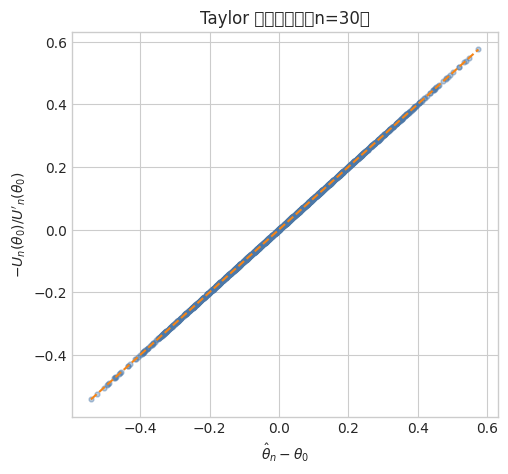

In [5]:
def taylor_approximation(n, reps=2000):
    x = rng.normal(theta0, sigma, size=(reps, n))
    mle = x.mean(axis=1)
    score = (x - theta0).sum(axis=1) / sigma**2
    second = -np.ones_like(x) / sigma**2
    u_prime = second.sum(axis=1)
    approx = -score / u_prime
    return mle - theta0, approx

n = 30
true_shift, approx_shift = taylor_approximation(n)

fig, ax = plt.subplots(figsize=(5.5, 5))
ax.scatter(true_shift, approx_shift, s=12, alpha=0.4, color="#4C78A8")
lims = [min(true_shift.min(), approx_shift.min()), max(true_shift.max(), approx_shift.max())]
ax.plot(lims, lims, color="#F58518", linestyle="--")
ax.set_xlabel(r"$\hat\theta_n - \theta_0$")
ax.set_ylabel(r"$-U_n(\theta_0)/U'_n(\theta_0)$")
ax.set_title("Taylor 近似の対応（n=30）")
plt.show()

## 10. MLE の漸近正規性

\(\sqrt{n}(\hat\theta_n-\theta_0)\) の分布を確認する。

/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28472 (\N{CJK UNIFIED IDEOGRAPH-6F38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


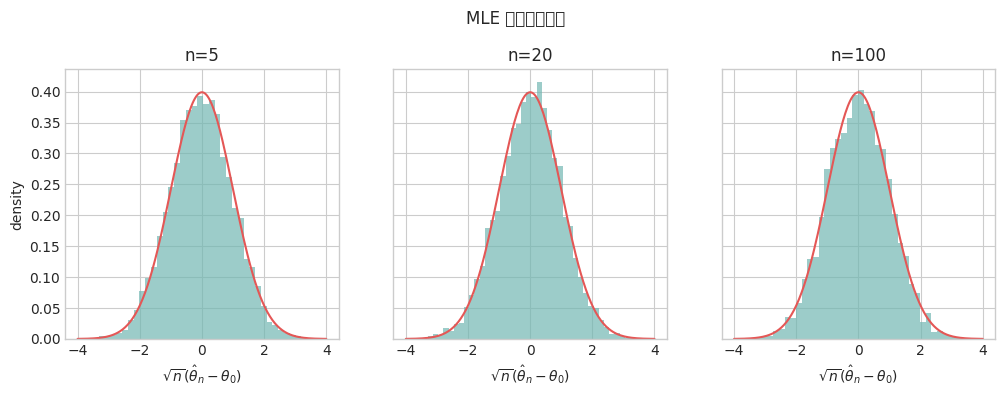

In [6]:
def simulate_mle_scaled(n, reps=5000):
    x = rng.normal(theta0, sigma, size=(reps, n))
    mle = x.mean(axis=1)
    return np.sqrt(n) * (mle - theta0)

fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True)

for ax, n in zip(axes, [5, 20, 100]):
    data = simulate_mle_scaled(n)
    ax.hist(data, bins=40, density=True, alpha=0.7, color="#72B7B2")
    xs = np.linspace(-4, 4, 200)
    ax.plot(xs, (1 / np.sqrt(2 * np.pi)) * np.exp(-xs**2 / 2), color="#E45756")
    ax.set_title(f"n={n}")
    ax.set_xlabel(r"$\sqrt{n}(\hat\theta_n-\theta_0)$")

axes[0].set_ylabel("density")
fig.suptitle("MLE の漸近正規性", y=1.05)
plt.show()

## 11. 分散の数値比較（効率性）

\(\mathrm{Var}(\hat\theta_n)\) と \(1/(nI)\) を比較。

In [7]:
rows = []
for n in [5, 10, 20, 50, 100, 200]:
    x = rng.normal(theta0, sigma, size=(4000, n))
    mle = x.mean(axis=1)
    var_hat = mle.var(ddof=0)
    rows.append({
        "n": n,
        "Var(theta_hat)": var_hat,
        "1/(nI)": 1 / n,
        "比率 Var / (1/(nI))": var_hat / (1 / n),
    })

variance_table = pd.DataFrame(rows)
variance_table

,n,Var(theta_hat),1/(nI),比率 Var / (1/(nI))
0,5,0.206102,0.200,1.030509
1,10,0.097955,0.100,0.979547
2,20,0.050138,0.050,1.002769
3,50,0.020452,0.020,1.022613
4,100,0.010315,0.010,1.031514
5,200,0.005068,0.005,1.013573


## 12. まとめ（流れだけ抜き出すと）

1. スコア \(U_n(\theta)\) と情報量 \(I(\theta)\) を定義し、
   \(\frac{1}{\sqrt{n}}U_n(\theta_0)\xrightarrow{d} N(0, I(\theta_0))\)（CLT）

2. MLE はスコア方程式 \(U_n(\hat\theta_n)=0\) を満たす

3. Taylor 展開で
   \(\sqrt{n}(\hat\theta_n-\theta_0)=(-\frac{1}{n}U'_n(\tilde\theta_n))^{-1}\cdot U_n(\theta_0)/\sqrt{n}\)

4. LLN＋連続性で \(-\frac{1}{n}U'_n(\tilde\theta_n)\xrightarrow{P} I(\theta_0)\)

5. Slutsky より
   \(\sqrt{n}(\hat\theta_n-\theta_0)\xrightarrow{d} N(0, I(\theta_0)^{-1})\)

6. よって **MLE は漸近的に効率的**